In [1]:
import os, sys, math
sys.path.insert(0, '../../../../FISH-annotation/Annotation')
from SpotAnnotationAnalysis import SpotAnnotationAnalysis
from QuantiusAnnotation import QuantiusAnnotation
import util
import pandas as pd

In [2]:
json_names = ['snrtest2.json', 'snrtest2_inv.json']
snr_list = [5, 7, 9, 11]
cwd = os.getcwd()

------------------------ snr_5_1_numspots_50_spot_img.png ------------------------


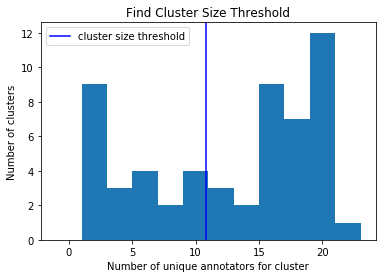

<Figure size 864x504 with 0 Axes>

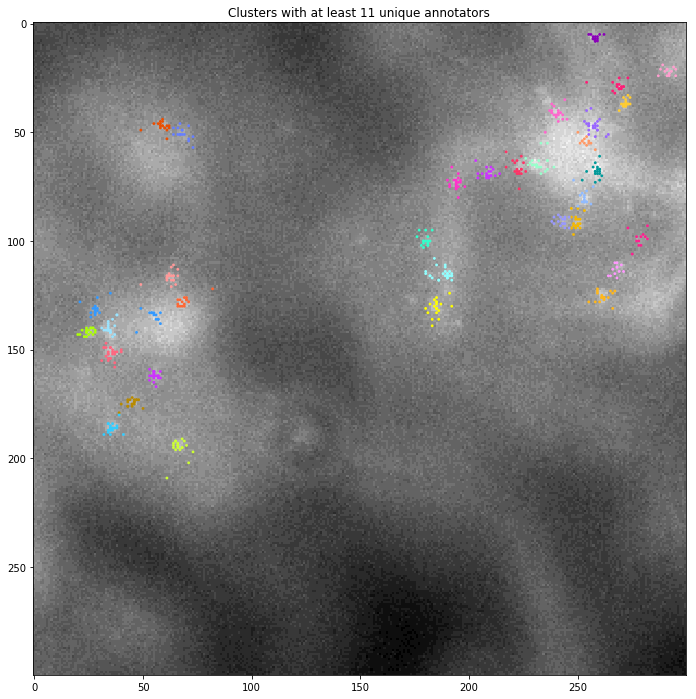

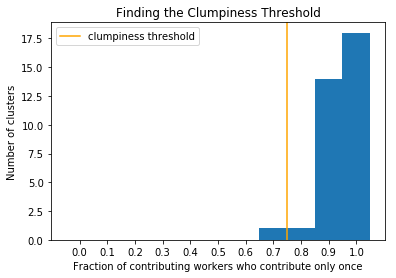

<Figure size 864x504 with 0 Axes>

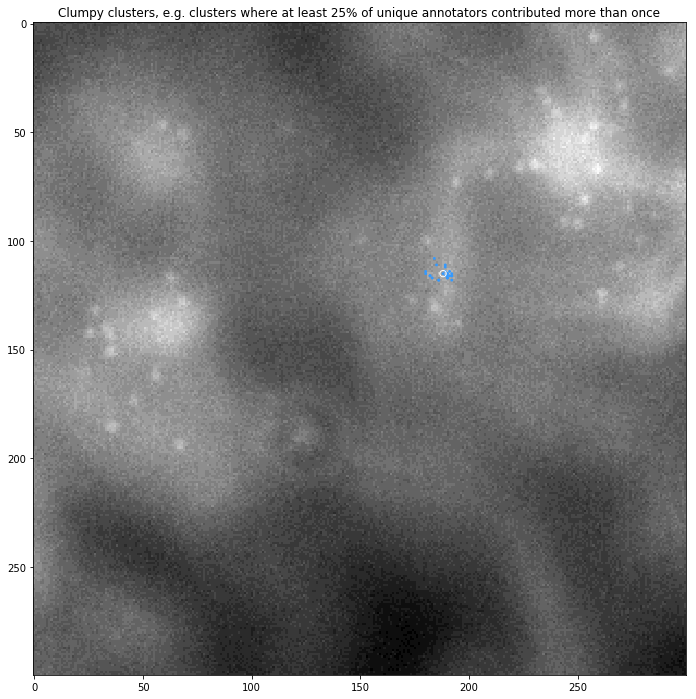

<Figure size 864x504 with 0 Axes>

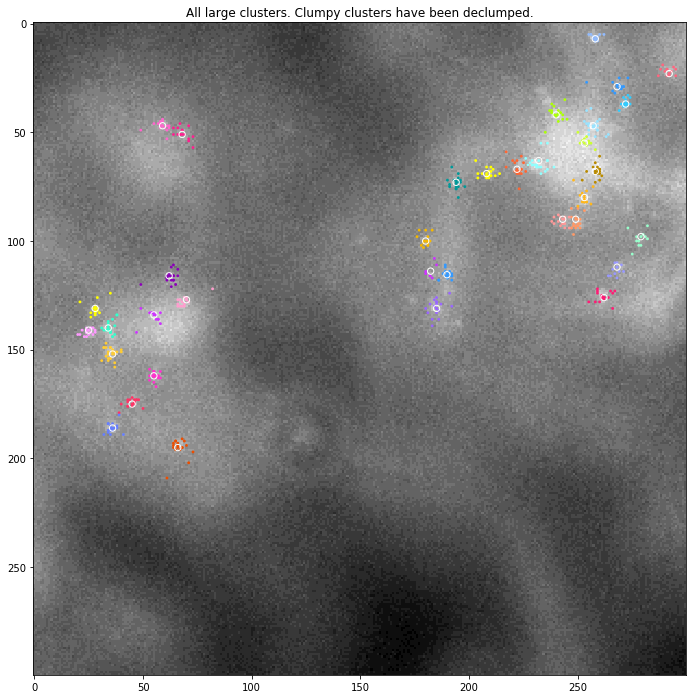

<Figure size 864x504 with 0 Axes>

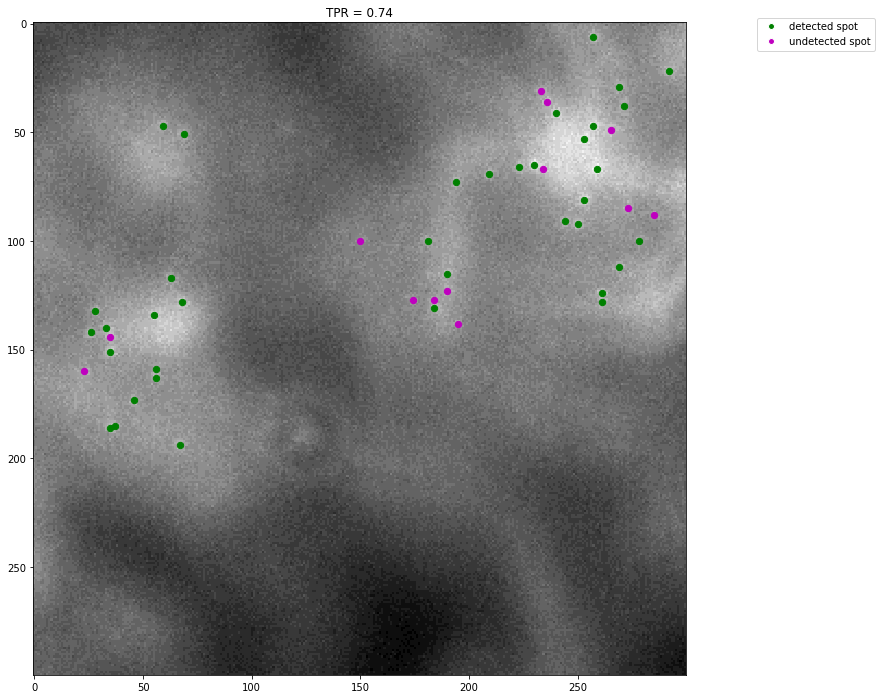

<Figure size 864x504 with 0 Axes>

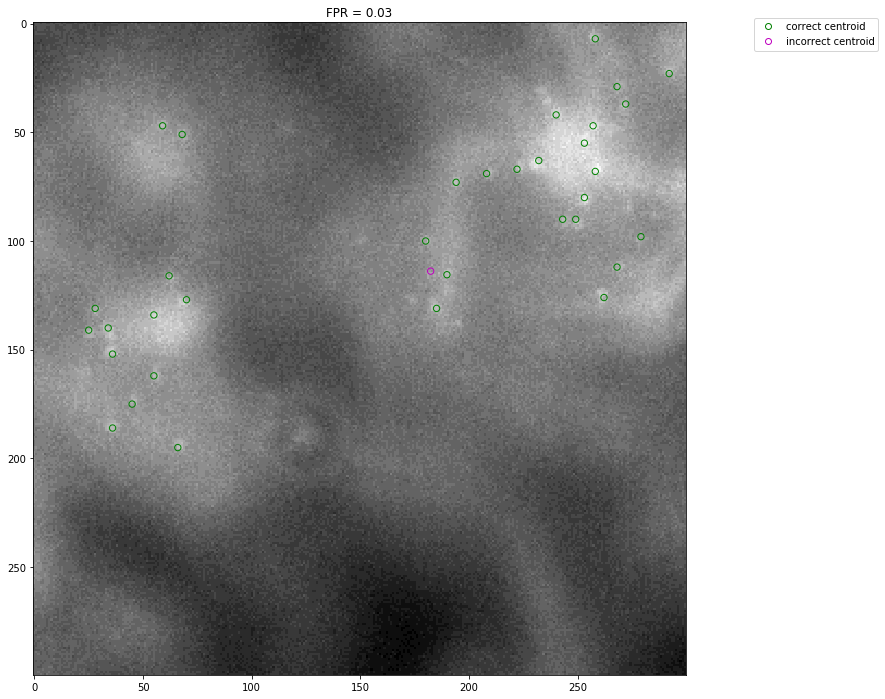

TPR: 0.74
FPR: 0.03
------------------------ snr_7_1_numspots_50_spot_img.png ------------------------


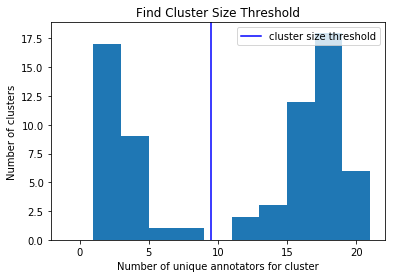

<Figure size 864x504 with 0 Axes>

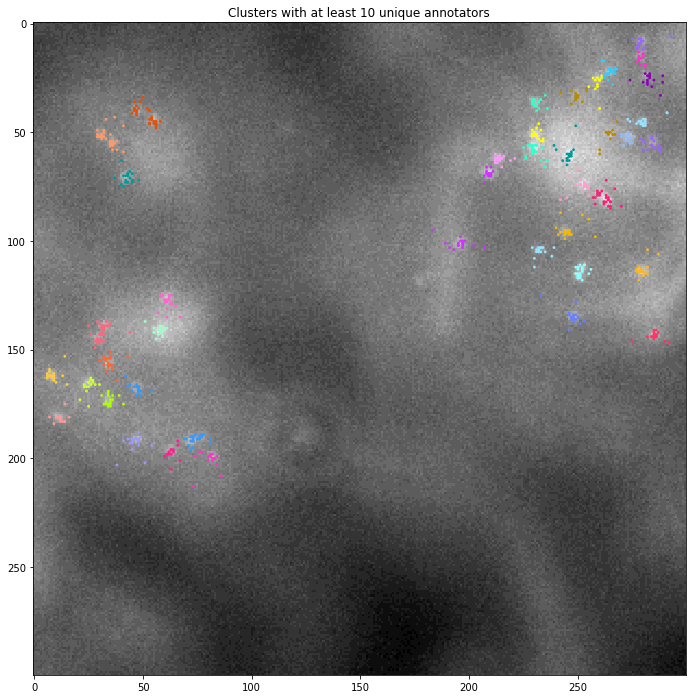

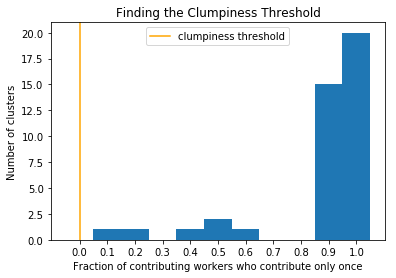

<Figure size 864x504 with 0 Axes>

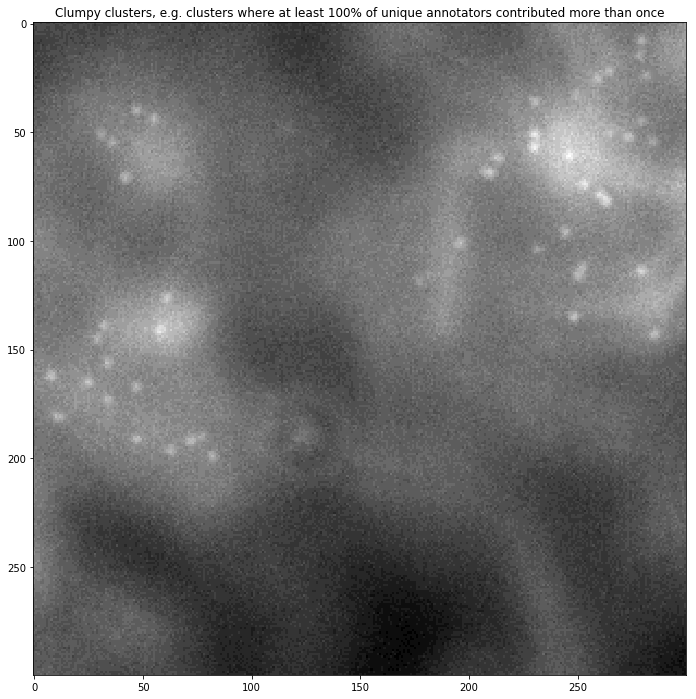

<Figure size 864x504 with 0 Axes>

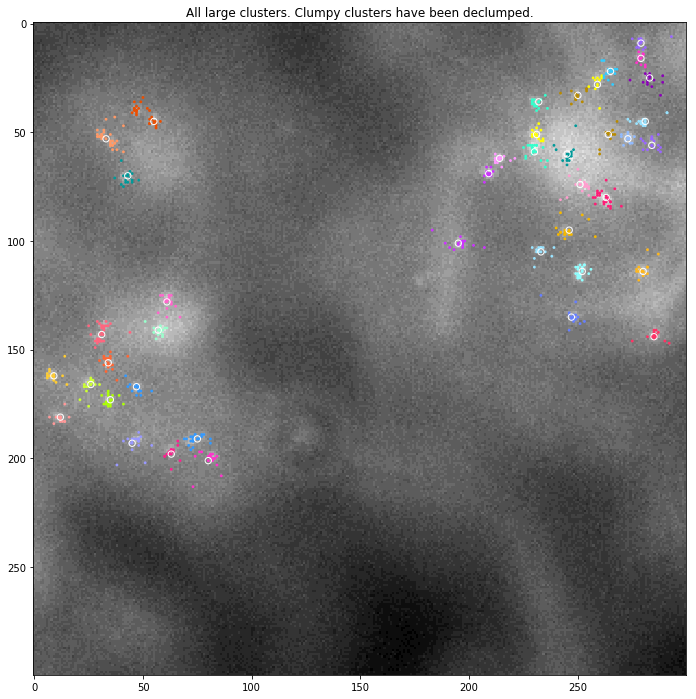

<Figure size 864x504 with 0 Axes>

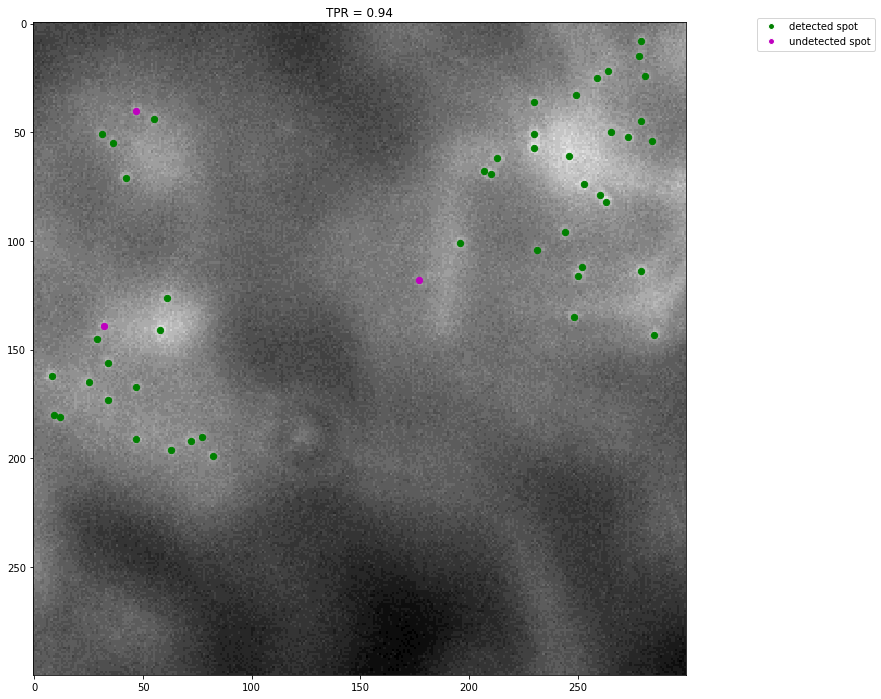

<Figure size 864x504 with 0 Axes>

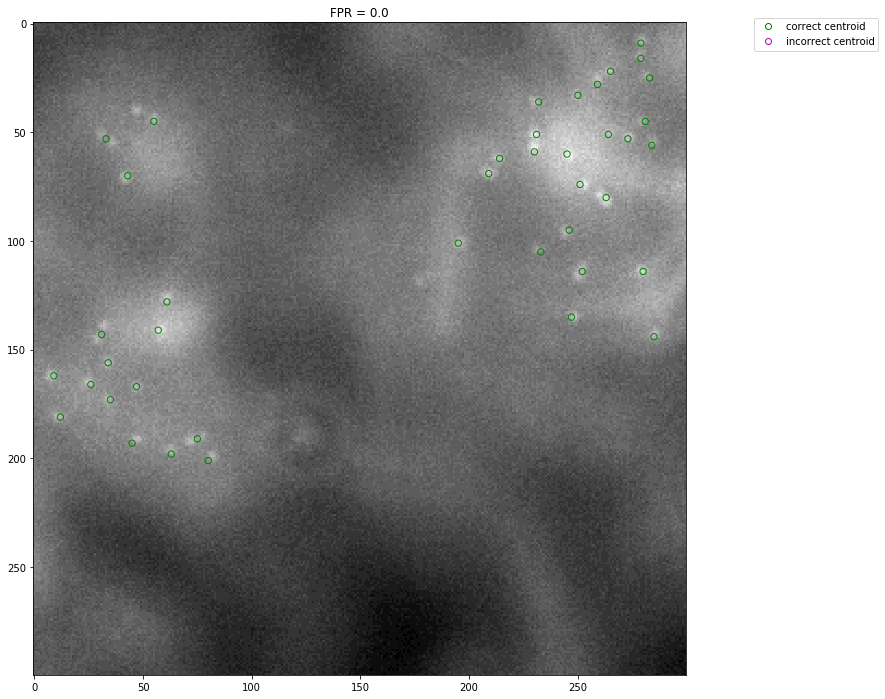

TPR: 0.94
FPR: 0.0
------------------------ snr_9_1_numspots_50_spot_img.png ------------------------


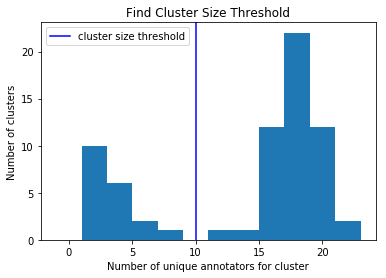

<Figure size 864x504 with 0 Axes>

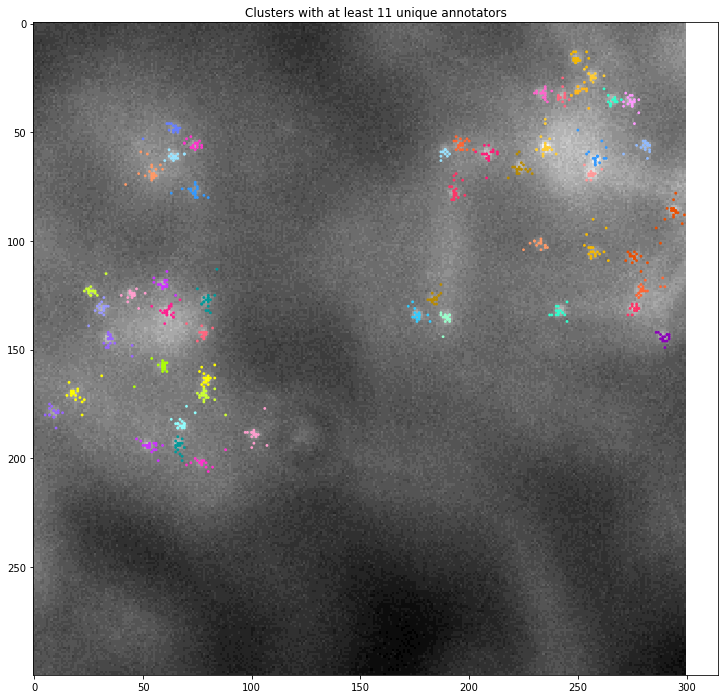

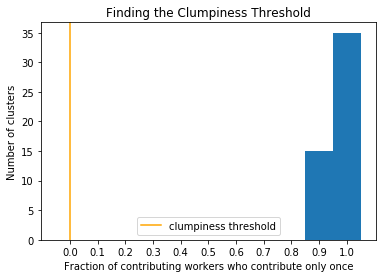

<Figure size 864x504 with 0 Axes>

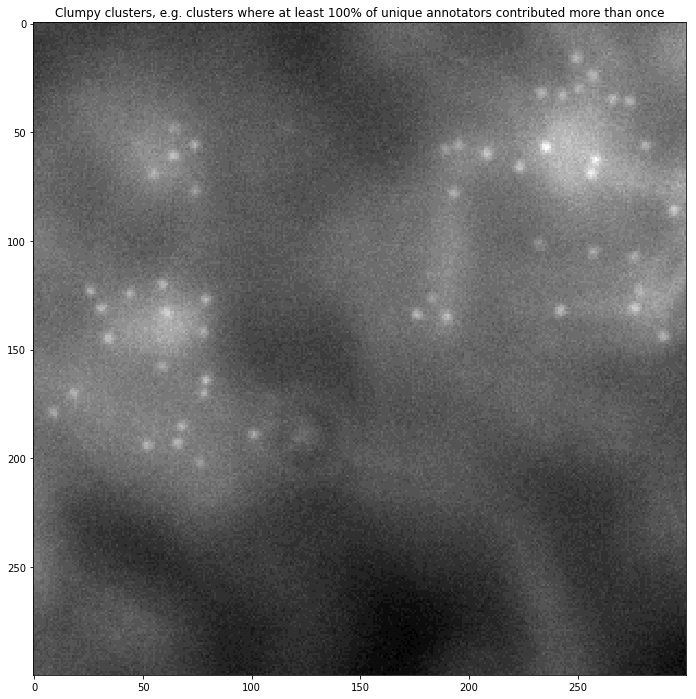

<Figure size 864x504 with 0 Axes>

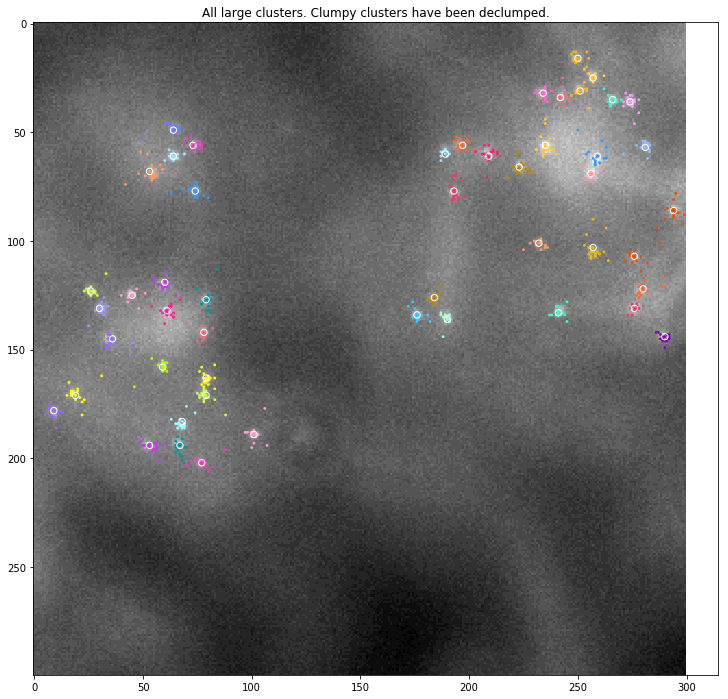

<Figure size 864x504 with 0 Axes>

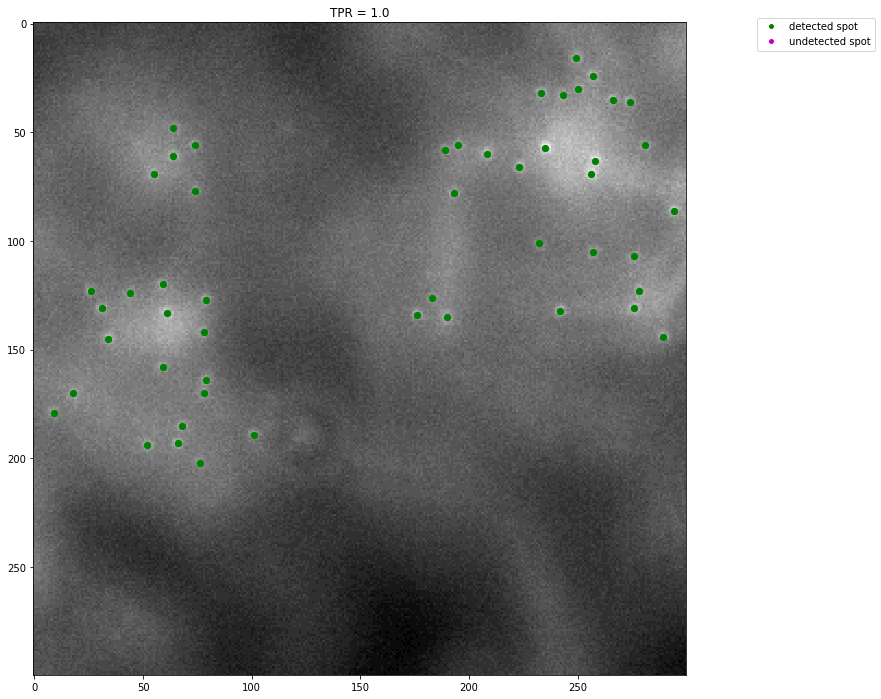

<Figure size 864x504 with 0 Axes>

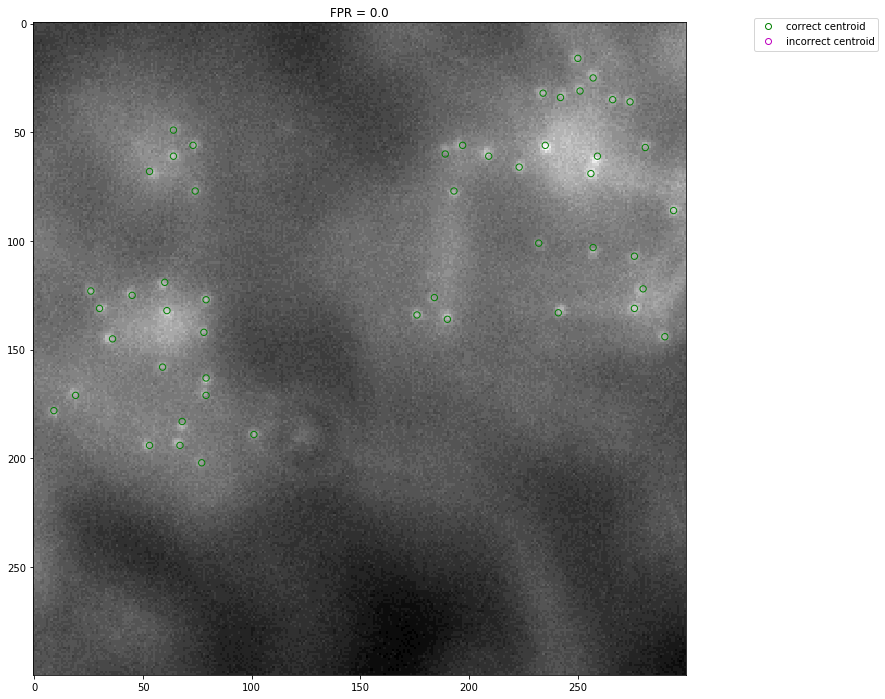

TPR: 1.0
FPR: 0.0
------------------------ snr_11_1_numspots_50_spot_img.png ------------------------


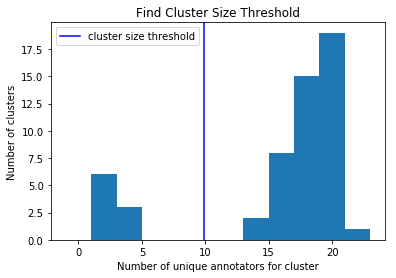

<Figure size 864x504 with 0 Axes>

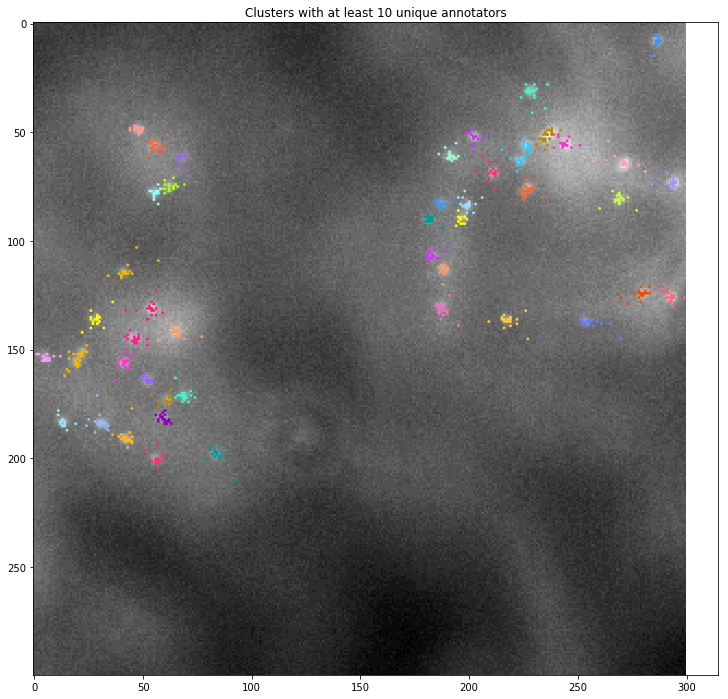

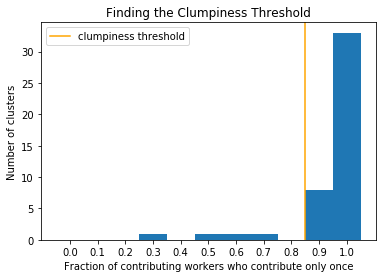

<Figure size 864x504 with 0 Axes>

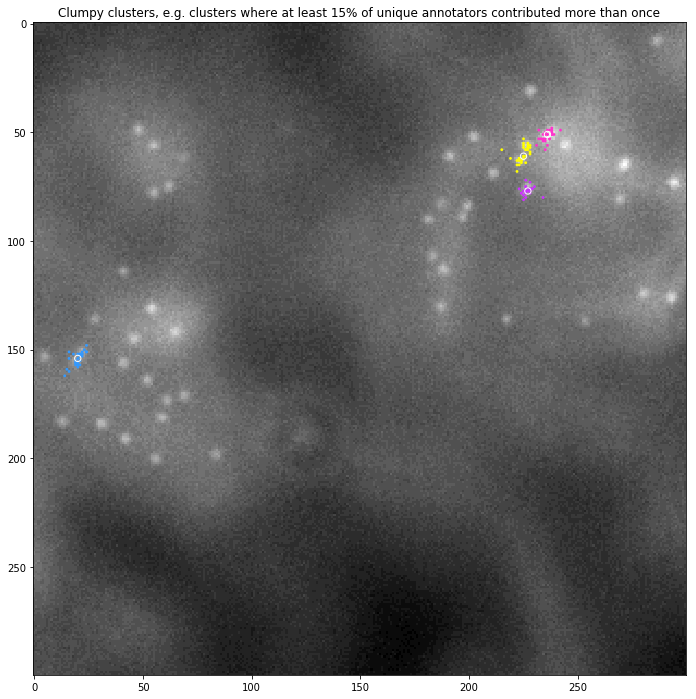

<Figure size 864x504 with 0 Axes>

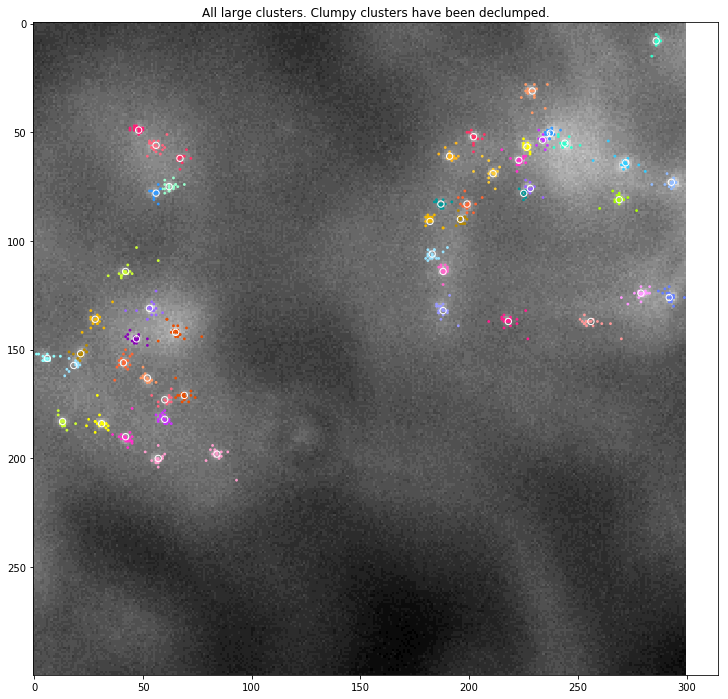

<Figure size 864x504 with 0 Axes>

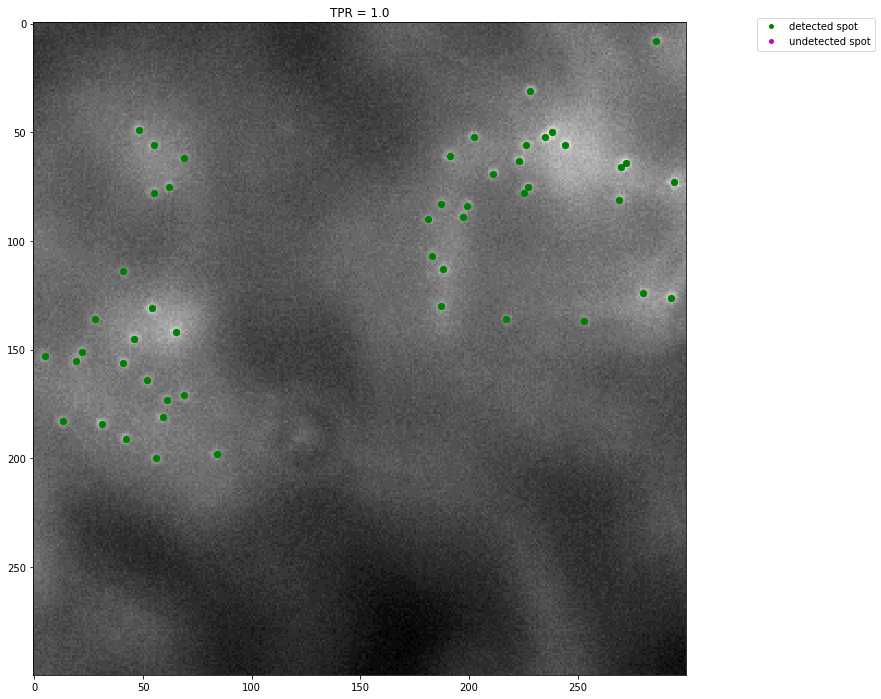

<Figure size 864x504 with 0 Axes>

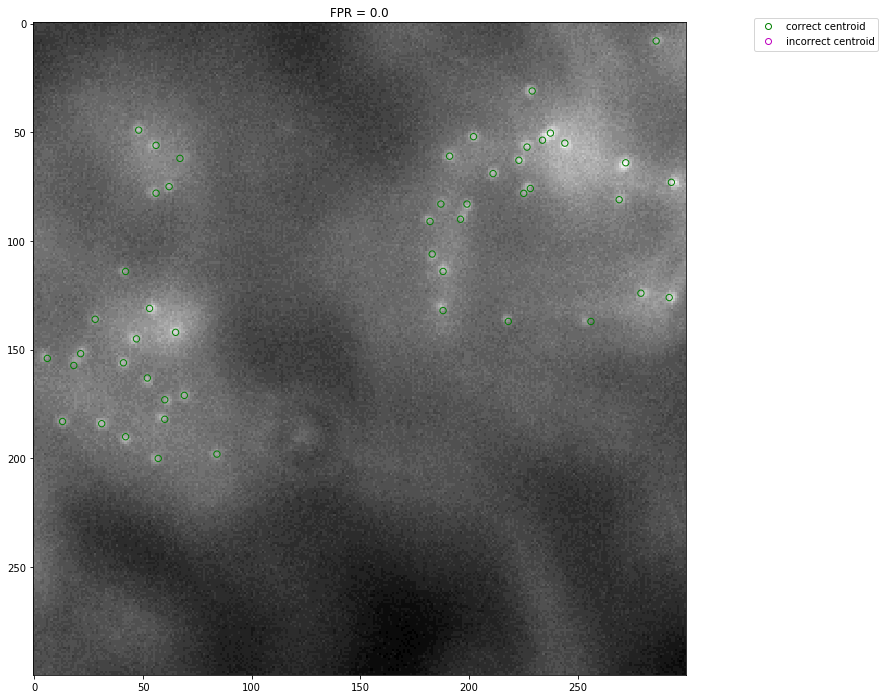

TPR: 1.0
FPR: 0.0
------------------------ snr_5_1_numspots_50_spot_img_inv.png ------------------------


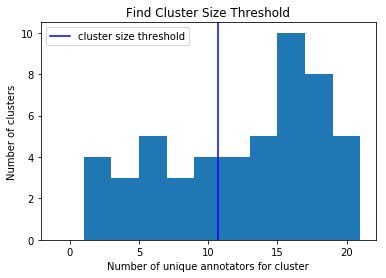

<Figure size 864x504 with 0 Axes>

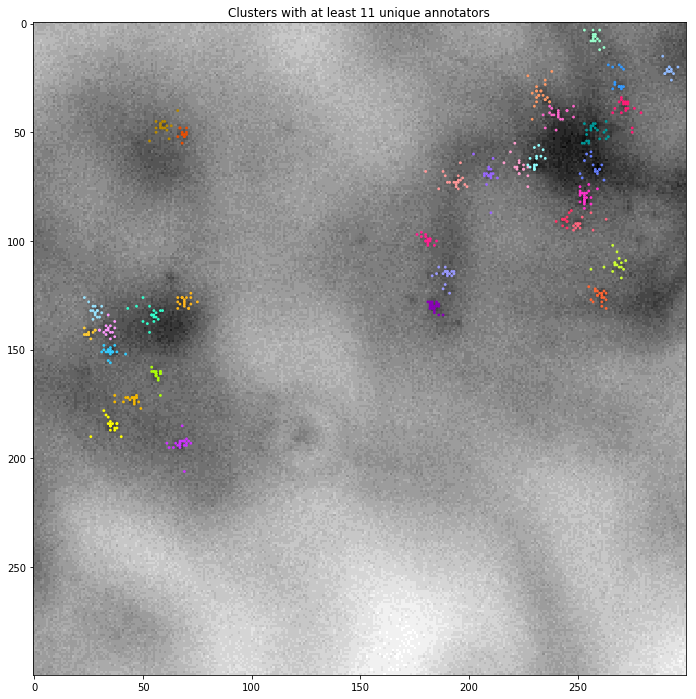

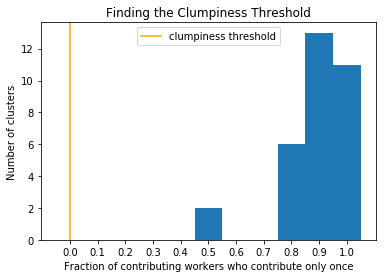

<Figure size 864x504 with 0 Axes>

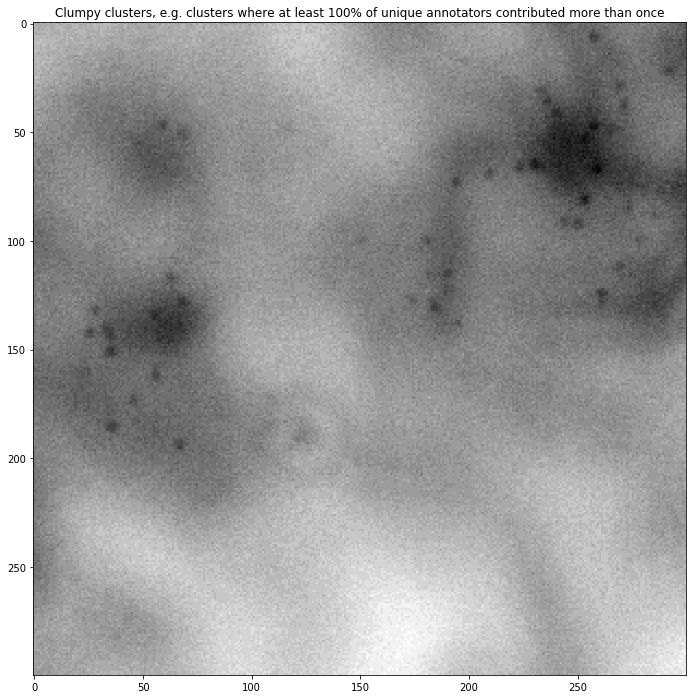

<Figure size 864x504 with 0 Axes>

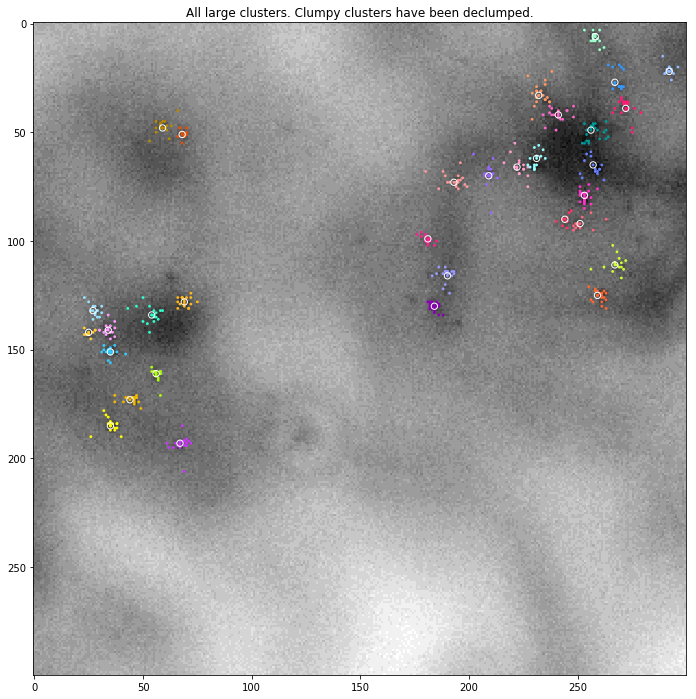

<Figure size 864x504 with 0 Axes>

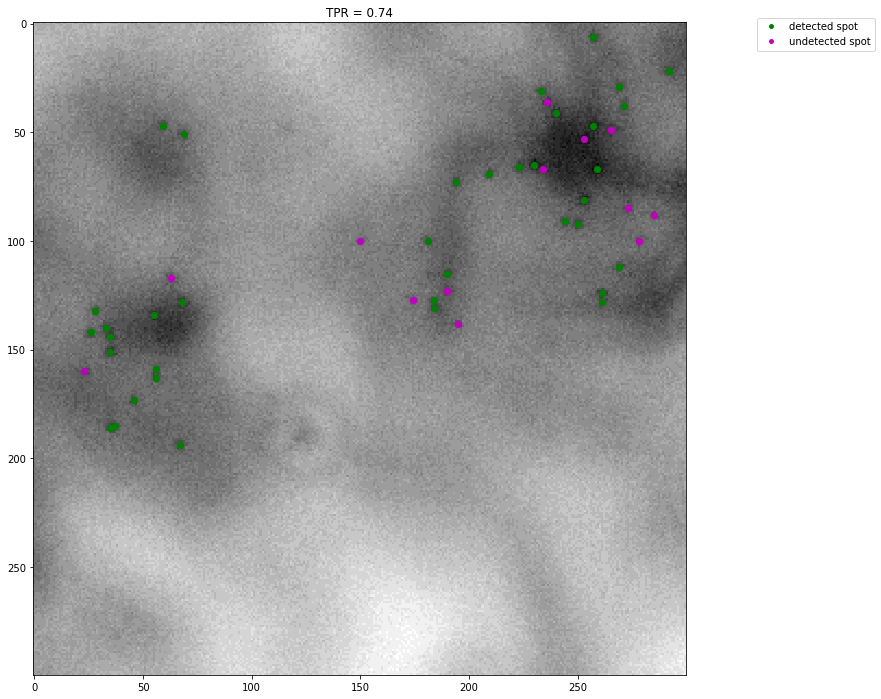

<Figure size 864x504 with 0 Axes>

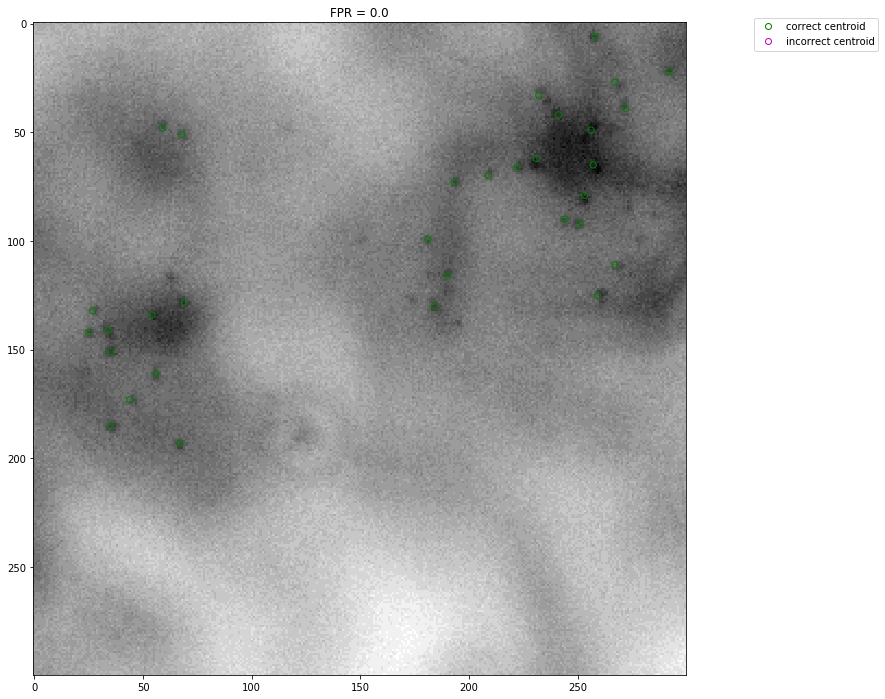

TPR: 0.74
FPR: 0.0
------------------------ snr_7_1_numspots_50_spot_img_inv.png ------------------------


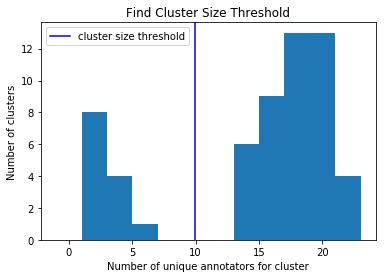

<Figure size 864x504 with 0 Axes>

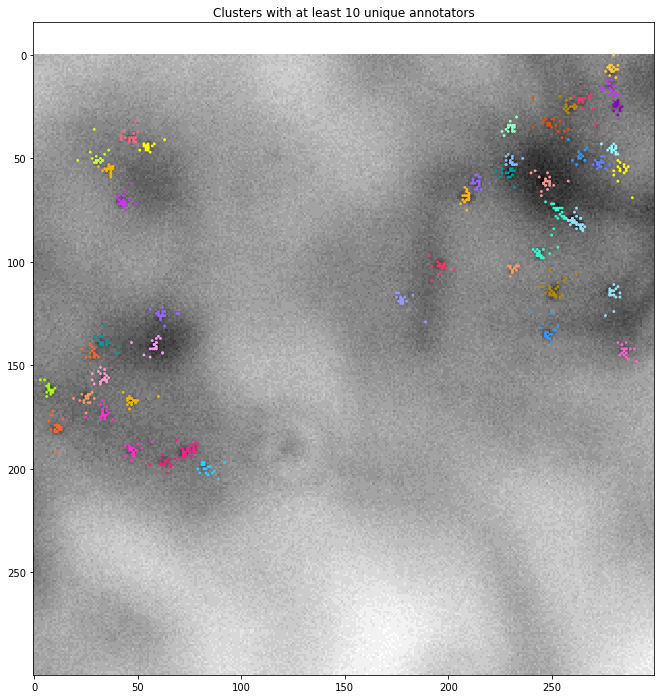

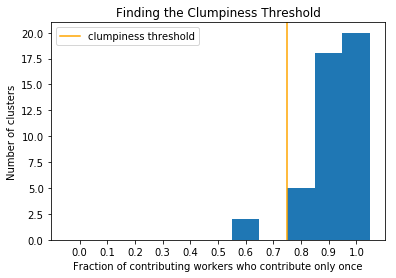

<Figure size 864x504 with 0 Axes>

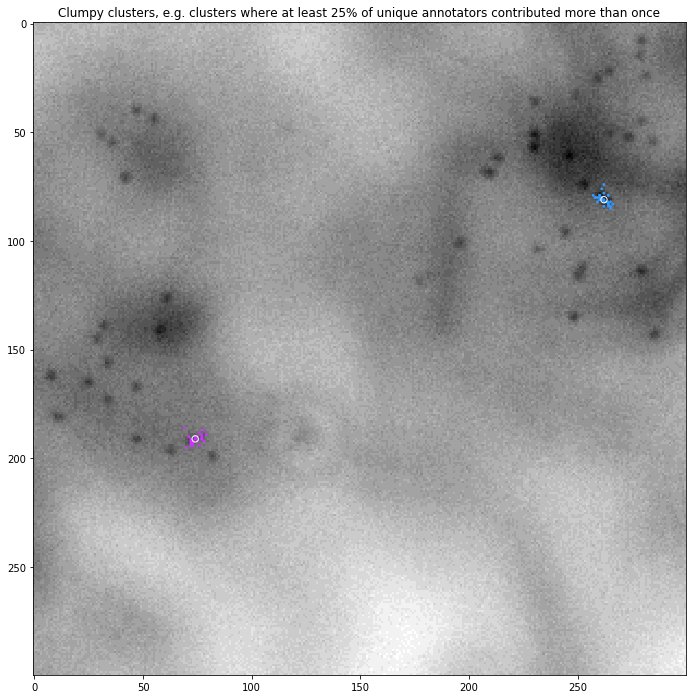

<Figure size 864x504 with 0 Axes>

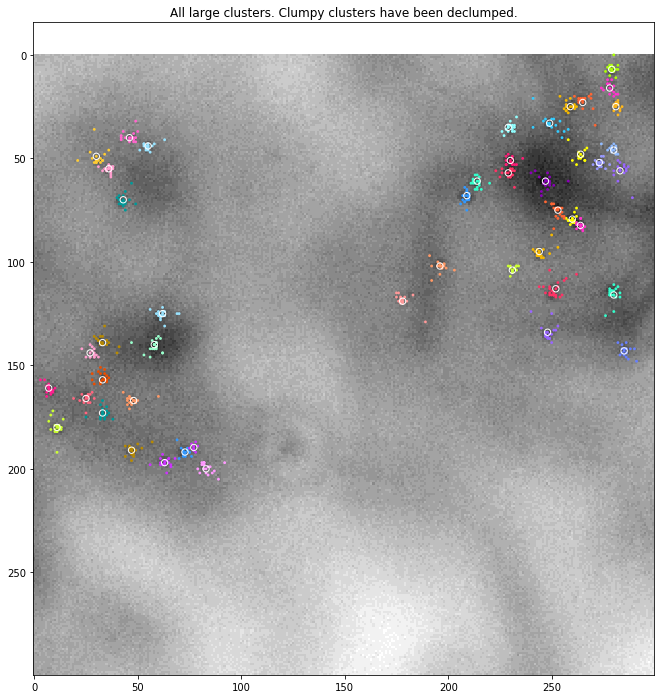

<Figure size 864x504 with 0 Axes>

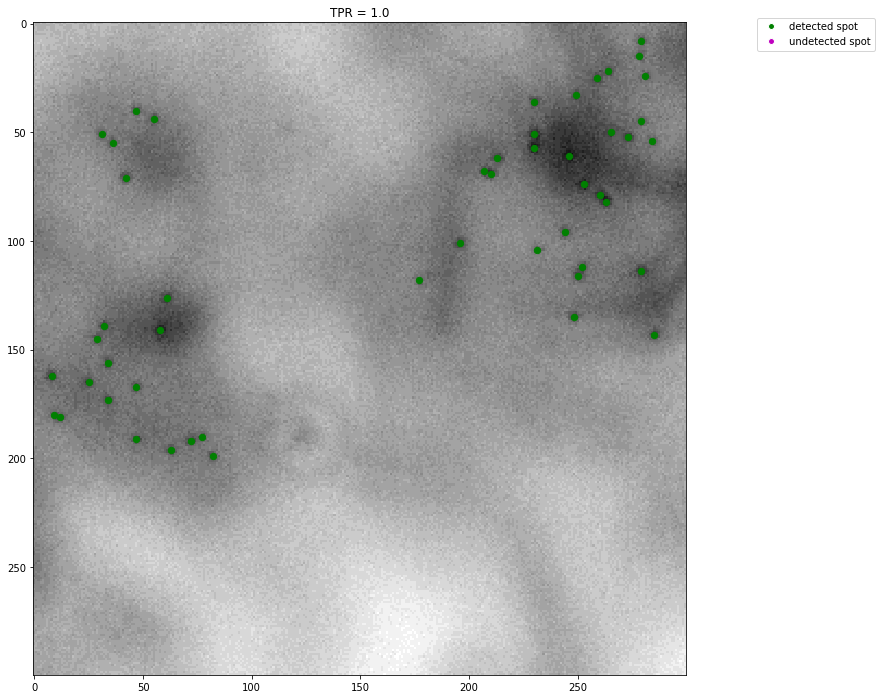

<Figure size 864x504 with 0 Axes>

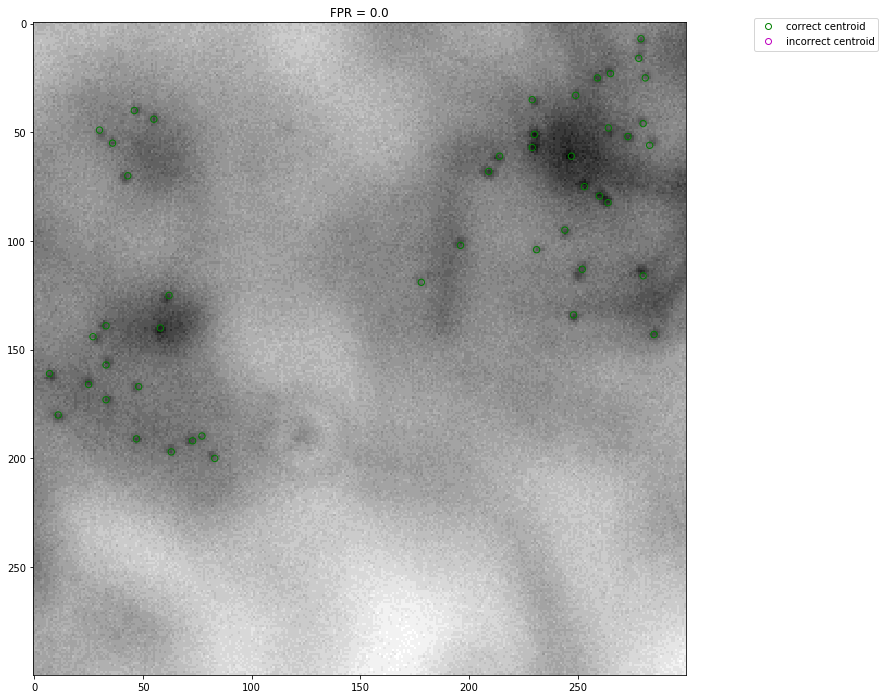

TPR: 1.0
FPR: 0.0
------------------------ snr_9_1_numspots_50_spot_img_inv.png ------------------------


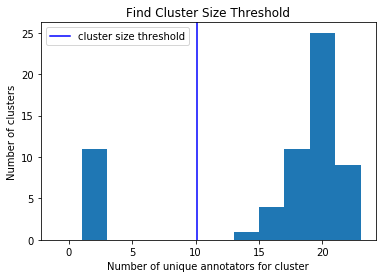

<Figure size 864x504 with 0 Axes>

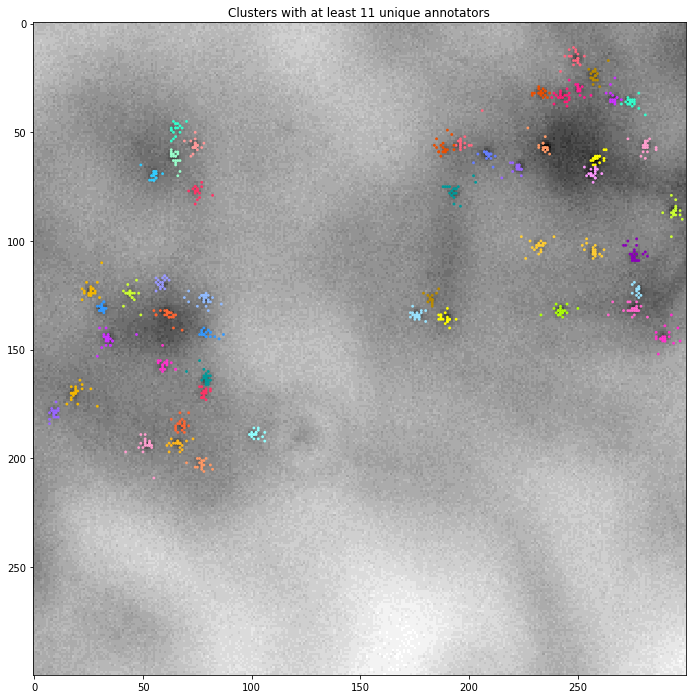

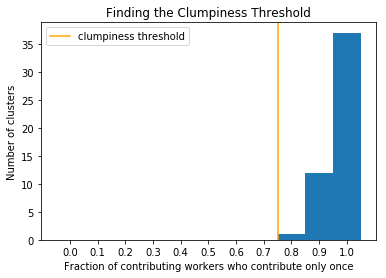

<Figure size 864x504 with 0 Axes>

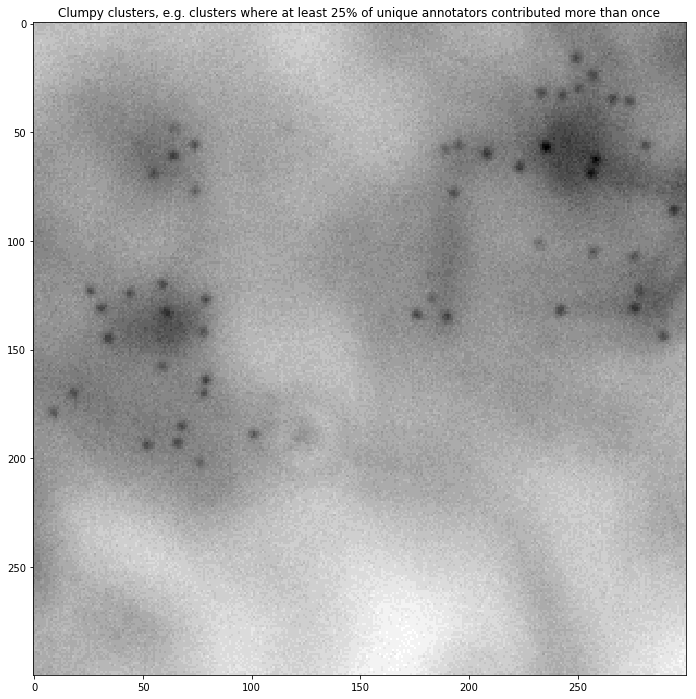

<Figure size 864x504 with 0 Axes>

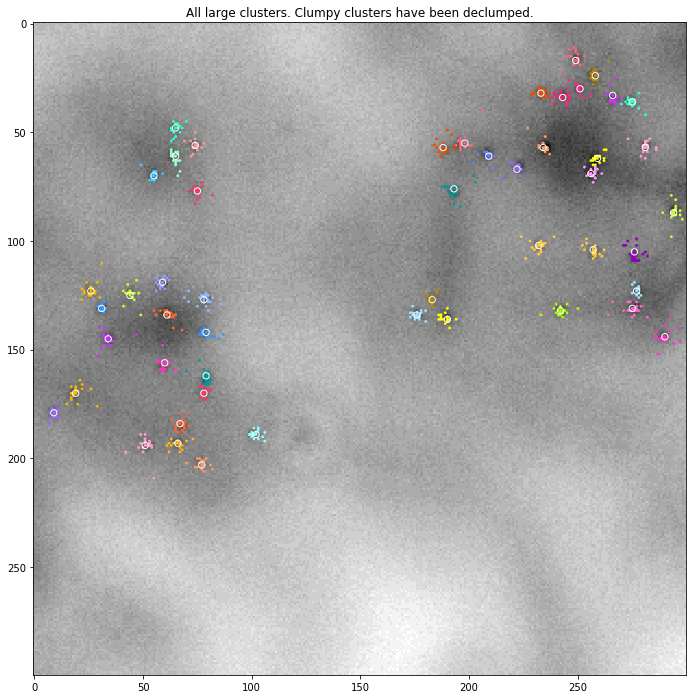

<Figure size 864x504 with 0 Axes>

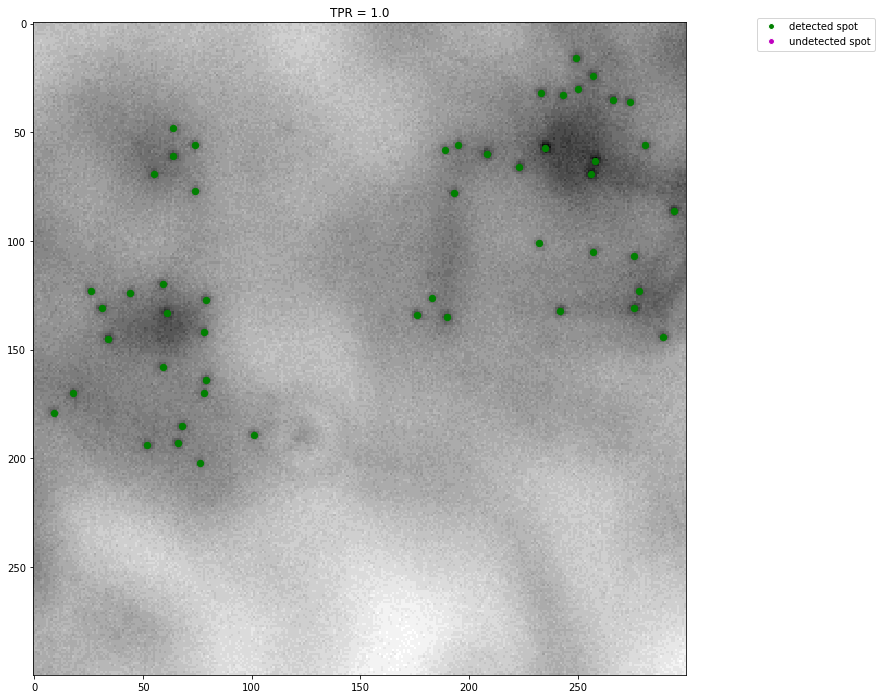

<Figure size 864x504 with 0 Axes>

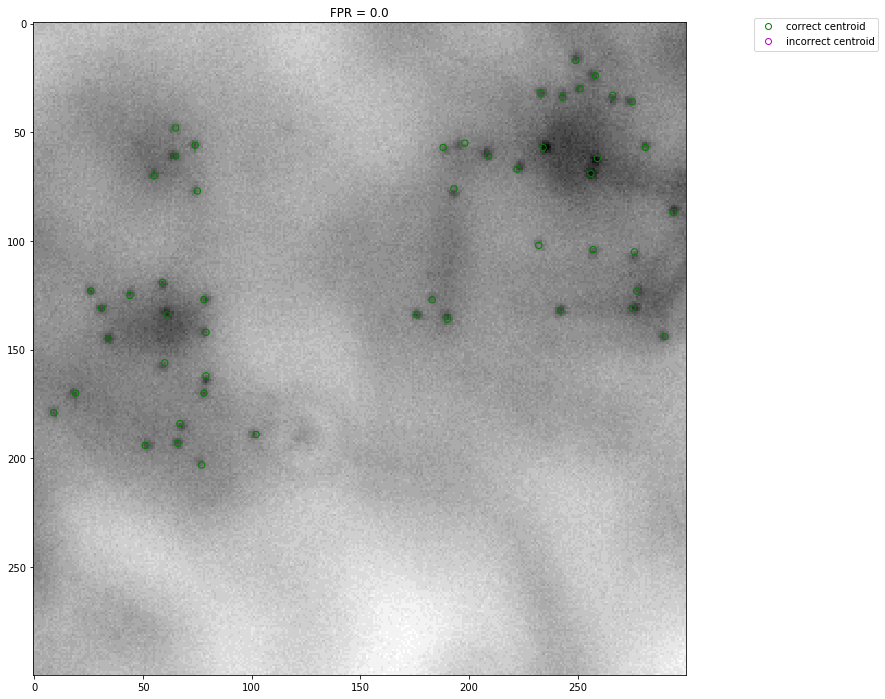

TPR: 1.0
FPR: 0.0
------------------------ snr_11_1_numspots_50_spot_img_inv.png ------------------------


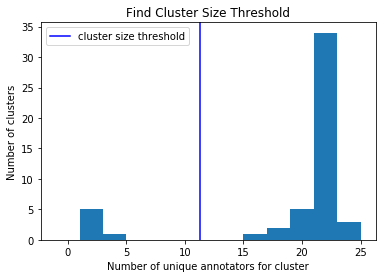

<Figure size 864x504 with 0 Axes>

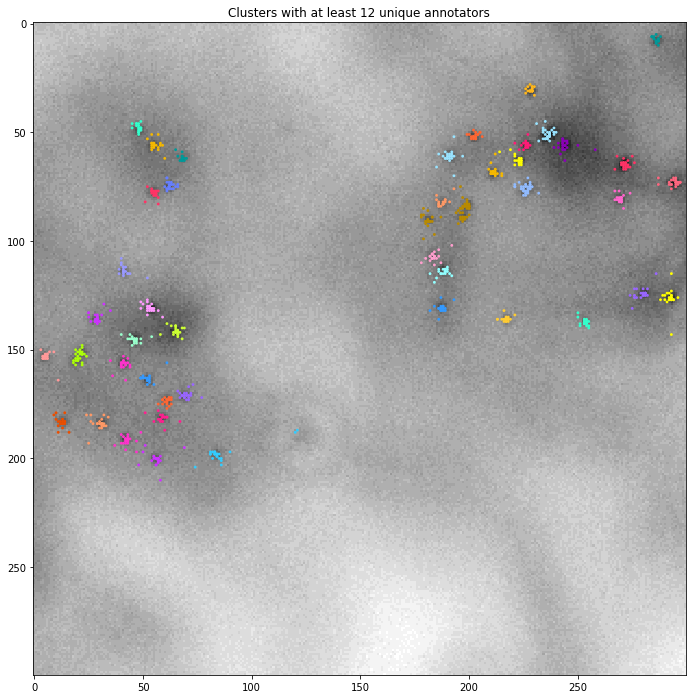

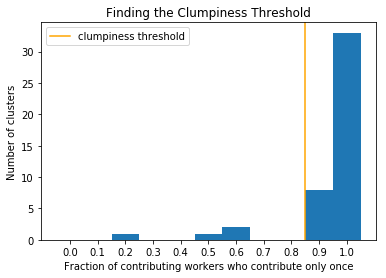

<Figure size 864x504 with 0 Axes>

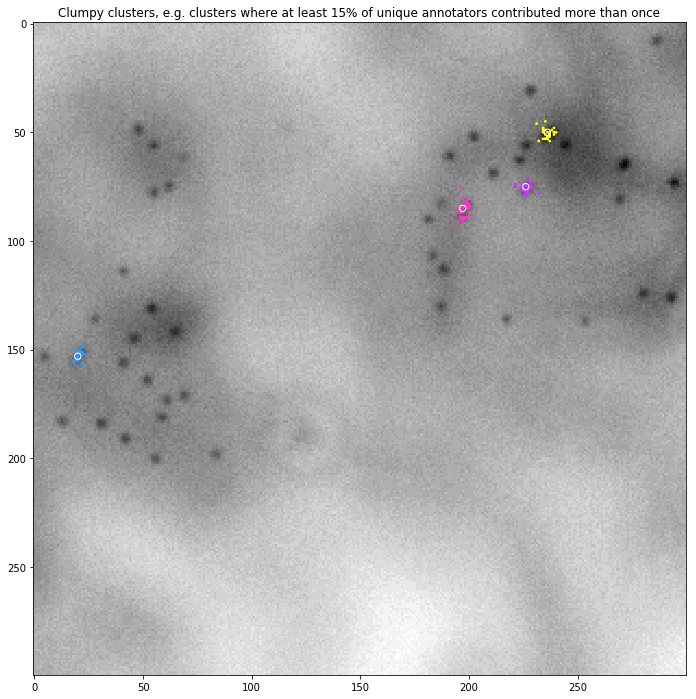

<Figure size 864x504 with 0 Axes>

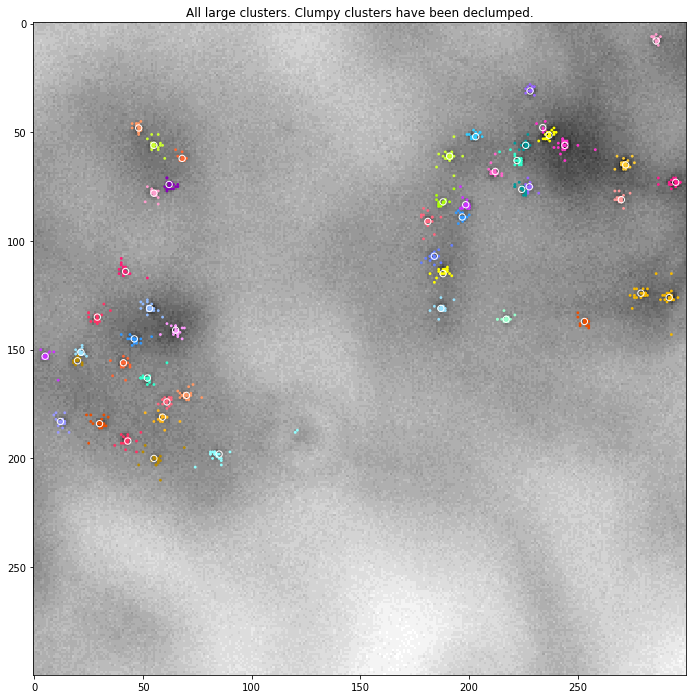

<Figure size 864x504 with 0 Axes>

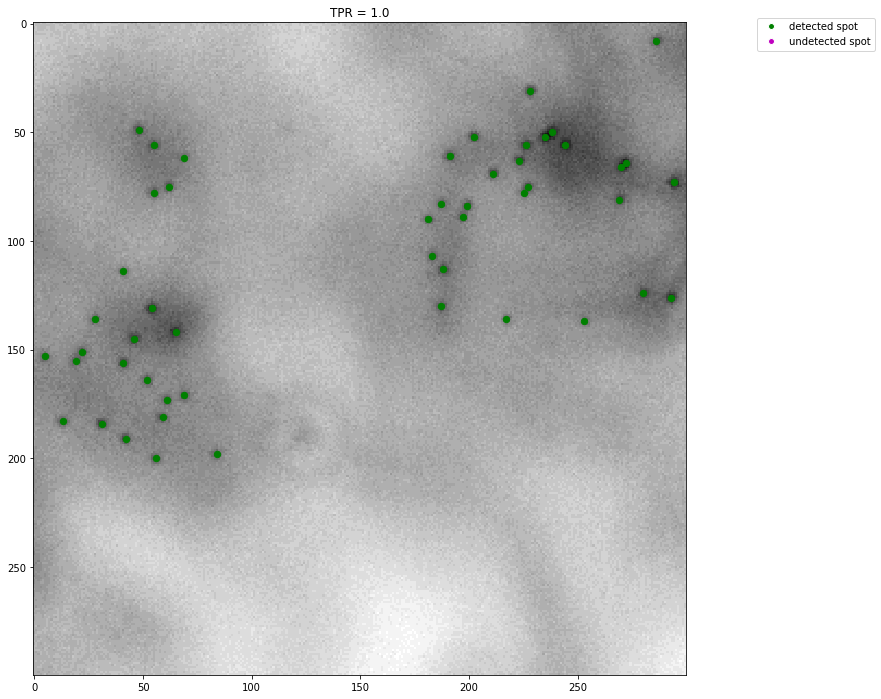

<Figure size 864x504 with 0 Axes>

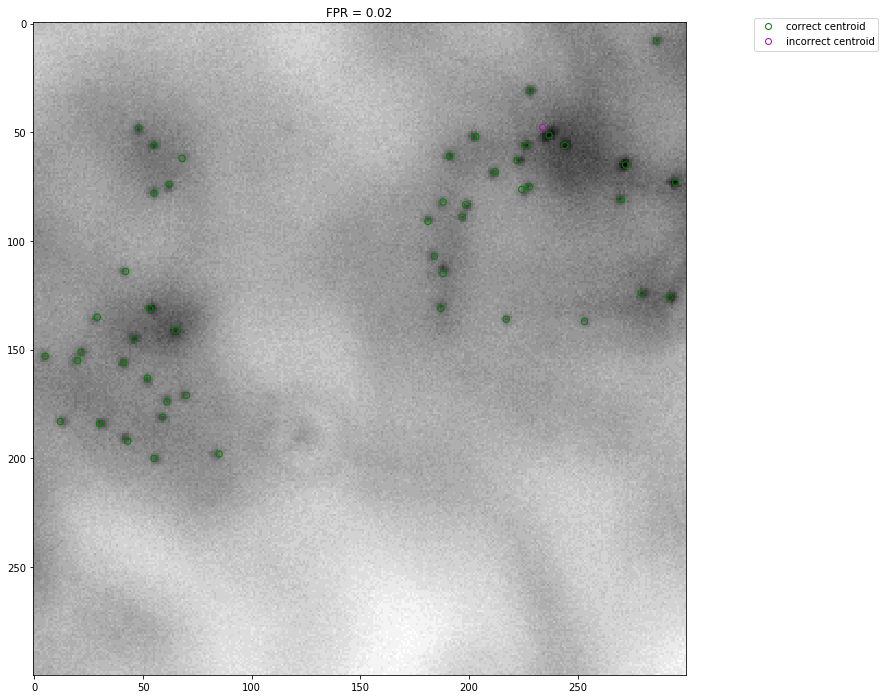

TPR: 1.0
FPR: 0.02


In [3]:
TPR_og, FPR_og, TPR_inv, FPR_inv = [], [], [], []

for json_name in json_names:
    x = '' if json_name == json_names[0] else '_inv'
    y = 'og' if json_name == json_names[0] else 'inv'
    
    for snr in snr_list:
        img_filename = 'snr_' + str(snr) + '_1_numspots_50_spot_img' + x + '.png'
        
        print('------------------------ ' + img_filename + ' ------------------------')
        img_filepath = cwd + '/spot_images/' + y + '/' + img_filename
        csv_filepath = cwd + '/spot_data/' + 'snr_' + str(snr) + '_1_numspots_50_coord_snr_list.csv'
        qa = QuantiusAnnotation(json_name, img_filename)
        sa = SpotAnnotationAnalysis(qa)
        anno_all = qa.df()
        
        clustering_params = ['AffinityPropagation', -350]
        clusters = sa.get_clusters(anno_all, clustering_params)
        
        img_height = anno_all['height'].values[0]
        centroid_and_ref_df = util.centroid_and_ref_df(clusters, csv_filepath, img_height)

        show_workers = False
        show_correctness_workers = False
        show_centroids = False
        show_correctness_centroids = False
        show_ref_points = False
        show_NN_inc = False
        correctness_threshold = 4
        worker_marker_size = 8
        cluster_marker_size = 40
        ref_marker_size = None
        bigger_window_size = True
                
        """ Screen by Cluster Size """
        cluster_size_threshold = util.get_cluster_size_threshold(clusters)
        small_clusters, large_clusters = util.sort_clusters_by_size(clusters, cluster_size_threshold)
        util.plot_cluster_size_threshold(clusters, cluster_size_threshold)
        show_workers = True
        show_centroids = False
        plot_title = 'Clusters with at least ' + str(math.ceil(cluster_size_threshold)) + ' unique annotators'
        x_bounds, y_bounds, show_ref_points = None, None, False
        util.visualize_clusters(large_clusters, show_workers, show_centroids, show_ref_points, worker_marker_size, cluster_marker_size, ref_marker_size, csv_filepath, img_filepath, img_height, x_bounds, y_bounds, plot_title, bigger_window_size)
        
        """ Detect Clumps """
        clumpiness_threshold = util.plot_clumpiness_threshold(large_clusters)
        clumpy_clusters, nonclumpy_clusters = util.sort_clusters_by_clumpiness(large_clusters, clumpiness_threshold)
        show_workers = True
        show_centroids = True
        plot_title = 'Clumpy clusters, e.g. clusters where at least ' + str(math.floor(100*(1-clumpiness_threshold))) + '% of unique annotators contributed more than once'
        util.visualize_clusters(clumpy_clusters, show_workers, show_centroids, show_ref_points, worker_marker_size, cluster_marker_size, ref_marker_size, csv_filepath, img_filepath, img_height, x_bounds, y_bounds, plot_title, bigger_window_size)
        
        """ Declump """
        declumping_params = ['KMeans', 2]
        result_clusters = nonclumpy_clusters
        for i in range(len(clumpy_clusters.index)):
            subclusters = util.declump(clumpy_clusters, i, declumping_params)
            result_clusters = pd.concat([subclusters, result_clusters], ignore_index=True)
        plot_title = 'All large clusters. Clumpy clusters have been declumped.'
        util.visualize_clusters(result_clusters, show_workers, show_centroids, show_ref_points, worker_marker_size, cluster_marker_size, ref_marker_size, csv_filepath, img_filepath, img_height, x_bounds, y_bounds, plot_title, bigger_window_size)
        
        """ FPR and TPR """
        
        plot_tpr, plot_fpr = True, False
        tpr, fpr = util.calc_fpr_tpr(result_clusters, csv_filepath, correctness_threshold, plot_tpr, plot_fpr, img_filepath, img_height, cluster_marker_size, bigger_window_size)
        plot_tpr, plot_fpr = False, True
        tpr, fpr = util.calc_fpr_tpr(result_clusters, csv_filepath, correctness_threshold, plot_tpr, plot_fpr, img_filepath, img_height, cluster_marker_size, bigger_window_size)
        print('TPR: ' + str(round(tpr, 2)))
        print('FPR: ' + str(round(fpr, 2)))
        
        if json_name == json_names[0]:
            TPR_og.append(tpr)
            FPR_og.append(fpr)
        else:
            TPR_inv.append(tpr)
            FPR_inv.append(fpr)            

In [5]:
sensitivity_og = TPR_og
specificity_og = [(1 - x) for x in FPR_og]
sensitivity_inv = TPR_inv
specificity_inv = [(1 - x) for x in FPR_inv]

SNR_list = [5, 7, 9, 11]
TPR_og
[0.74, 0.94, 1.0, 1.0]
FPR_og
[0.03, 0.0, 0.0, 0.0]
TPR_inv
[0.74, 1.0, 1.0, 1.0]
FPR_inv
[0.0, 0.0, 0.0, 0.02]


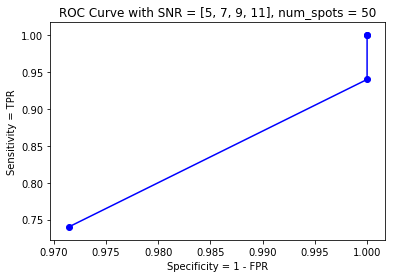

TPR_og
[0.74, 0.94, 1.0, 1.0]
FPR_og
[0.03, 0.0, 0.0, 0.0]


In [8]:
plt.plot(specificity_og, sensitivity_og, color='blue')
plt.scatter(specificity_og, sensitivity_og, c='blue')
plt.title('ROC Curve with SNR = [5, 7, 9, 11], num_spots = 50')
plt.xlabel('Specificity = 1 - FPR')
plt.ylabel('Sensitivity = TPR')
plt.show()
print('TPR_og')
print ([round(i, 2) for i in TPR_og])
print('FPR_og')
print ([round(i, 2) for i in FPR_og])

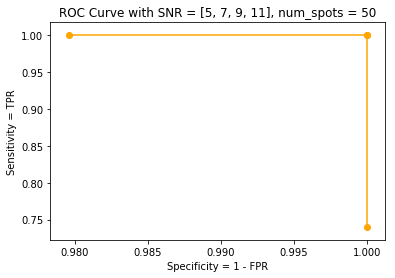

TPR_inv
[0.74, 1.0, 1.0, 1.0]
FPR_inv
[0.0, 0.0, 0.0, 0.02]


In [9]:
plt.plot(specificity_inv, sensitivity_inv, color='orange')
plt.scatter(specificity_inv, sensitivity_inv, c='orange')
plt.title('ROC Curve with SNR = [5, 7, 9, 11], num_spots = 50')
plt.xlabel('Specificity = 1 - FPR')
plt.ylabel('Sensitivity = TPR')
plt.show()
print('TPR_inv')
print ([round(i, 2) for i in TPR_inv])
print('FPR_inv')
print ([round(i, 2) for i in FPR_inv])